In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data/data.xlsx') 

QUANTILE TRANSFORMER

Этот метод трансформации признаков преобразует распределение переменной в нормальное или равномерное распределение и масштабирует его соответствующим образом.

Квантильное преобразование сопоставляет распределение вероятностей переменной с другим распределением вероятностей с использованием квантильной функции.

Квантильная функция, также называемая функцией процентной точки (PPF), является обратной функцией кумулятивного распределения вероятностей (CDF).

CDF — это функция, которая возвращает вероятность значения, равного или меньше заданного значения.

PPF является инверсией этой функции и возвращает значение с заданной вероятностью или ниже неё.

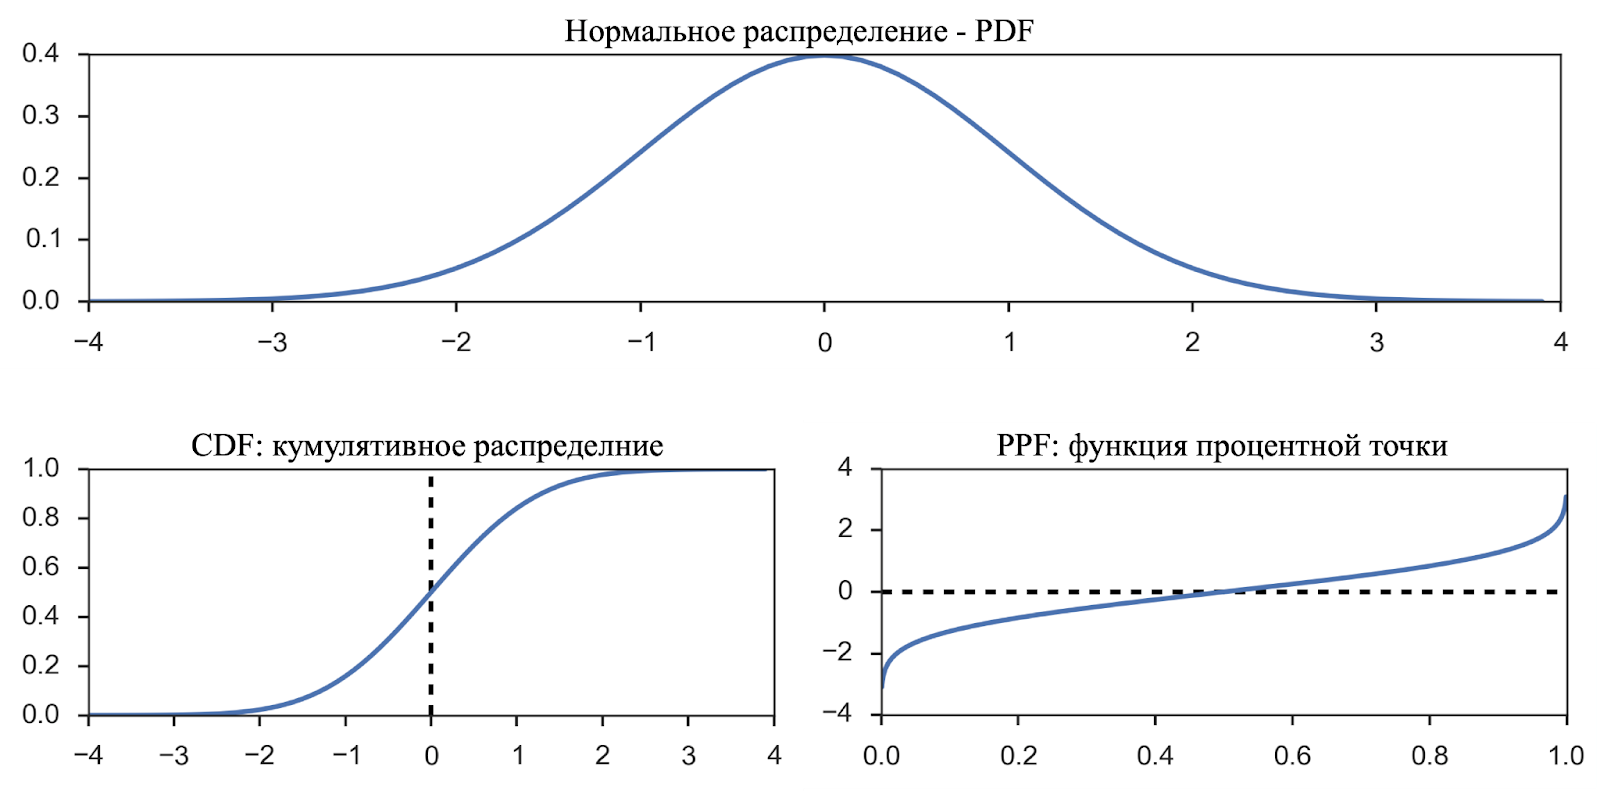

Квантильная функция ранжирует или сглаживает взаимосвязь между наблюдениями и может быть отображена на другие распределения (равномерное или нормальное).

Это квантильное преобразование доступно в библиотеке машинного обучения Python scikit-learn через класс QuantileTransformer.

У класса есть аргумент output_distribution, который отвечает за тип выходного распределения. Он может принимать значение 'uniform' (равномерное распределение) или 'normal' (нормальное распределение). По умолчанию используется равномерное распределение, то есть значение параметра равно 'uniform'.

Гиперпараметр n_quantiles определяет разрешение отображения или ранжирование наблюдений в наборе данных. Это значение должно быть меньше, чем количество наблюдений в наборе данных, и по умолчанию равно 1000.

Поскольку этот метод изменяет само распределение переменных, из-за этого скейлера линейные отношения между переменными могут быть разрушены. Таким образом, лучше всего использовать его для нелинейных данных.

Применим данное преобразование к признаку year. Для начала посмотрим на его распределение.

# Трансформация признаков

распределение признака year

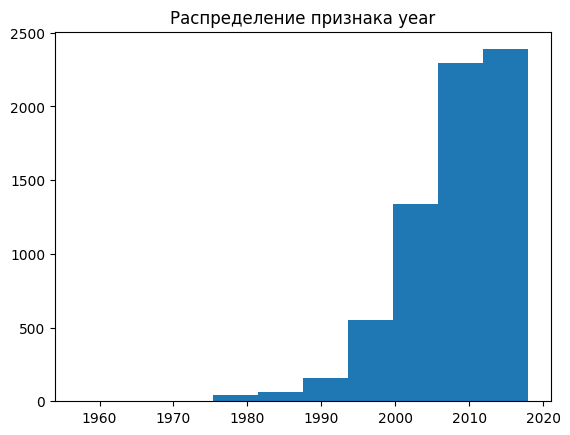

In [4]:
plt.hist(data.year)
plt.title('Распределение признака year');

## Квантильное преобразование

трансформированное распределения признака year

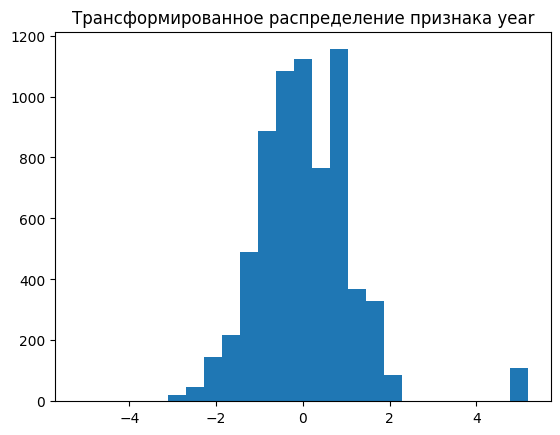

In [5]:
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

6.1 Преобразуйте распределение признаков condition и cylinders в равномерное. Какое значение признака condition получится у нулевого объекта? Ответ округлите до второго знака после точки-разделителя.

In [6]:
data_for_transform = data['condition'].values.reshape((len(data),1))
 
quantile = QuantileTransformer()
data_transformed = quantile.fit_transform(data_for_transform)
 
data_transformed[0]

KeyError: 'condition'

## Логарифмическое преобразование

LOG TRANSFORM

Логарифмическое преобразование — один из самых популярных методов преобразования. В основном оно используется для превращения асимметричного распределения в нормальное/менее асимметричное. В этом преобразовании мы берём логарифм значений признака вместо самих значений.

Почему это работает? Потому что функция логарифма создана для работы с большими числами.

Посмотрим на распределение признака price. Оно асимметрично, причём значения варьируются от 0 до ~300000.

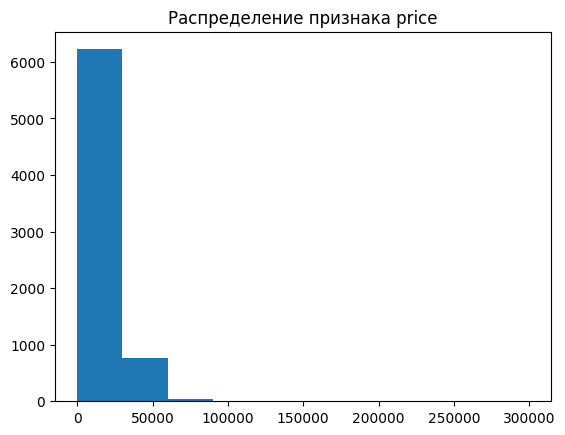

In [ ]:
plt.hist(data.price)
plt.title('Распределение признака price');

Идеальный кандидат для логарифмического преобразования — применим его. На этот раз обойдёмся силами numpy.

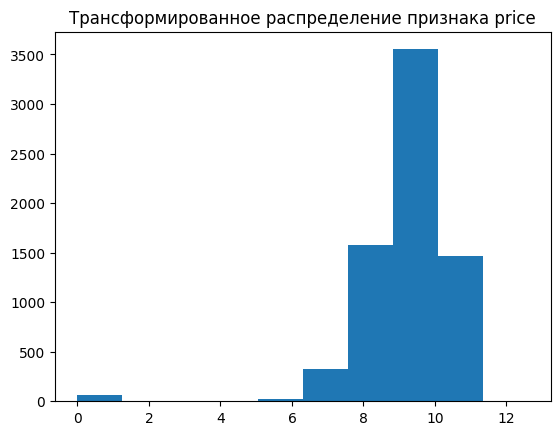

In [ ]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

Давайте также сравним значения исходного и трансформированного признака.

In [ ]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


Теперь вместо экстремального разброса значений в 1 и 299500 мы получили 0 и 12.6. Таким образом, логарифмическое преобразование сыграло роль в уменьшении влияния слишком низких и слишком высоких значений.

Стоит учесть, что, если наши данные имеют отрицательные значения или значения в диапазоне от 0 до 1, мы не можем применить логарифмическое преобразование напрямую, поскольку логарифм отрицательных чисел и 0 не определён, то есть мы получим ошибки или значения NaN в наших данных. В таких случаях мы можем добавить число к этим значениям, чтобы все они были больше 1.

6.3 Какое значение признака transformed_price имеет последний объект? Ответ округлите до одного знака после точки-разделителя.

In [ ]:
#9.80

## Преобразование Бокса-Кокса

POWER TRANSFORMER SCALER

Как и другие скейлеры, с которыми вы уже познакомились, Power Transformer также изменяет распределение переменной, то есть делает его более гауссовым (нормальным).

Однако чтобы использовать все изученные раннее методы трансформации и скейлинга, необходимо сначала понять исходное распределение признака, а затем уже делать выбор. Power Transformer фактически автоматизирует принятие этого решения, вводя параметр, называемый lambda. Он принимает решение об обобщённом степенном преобразовании, находя наилучшее значение lambda и используя один из следующих параметрических методов:

* Преобразование Бокса-Кокса, которое работает для положительных значений признака.
* Преобразование Йео-Джонсона, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.

В нашем случае мы будем использовать преобразование Бокса-Кокса, так как все значения положительны.

In [7]:
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

d:\Program Files\Python311\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
d:\Program Files\Python311\Lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


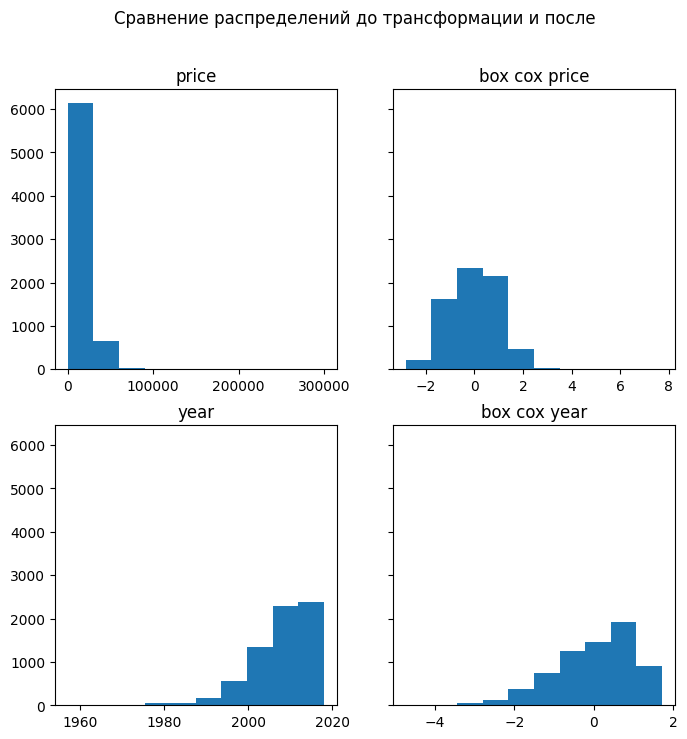

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()